# Look into ndpyramid

In [2]:
import xarray as xr
from dask.distributed import Client, LocalCluster
import rioxarray
from ndpyramid import pyramid_coarsen, pyramid_reproject, pyramid_regrid
import matplotlib.pyplot as plt

In [3]:
cluster = LocalCluster()
client = Client(cluster)
client

2022-04-28 08:25:36,270 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/matthewiannucci/Developer/restful-grids/pyramid/dask-worker-space/worker-p6iu6q93', purging
2022-04-28 08:25:36,270 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/matthewiannucci/Developer/restful-grids/pyramid/dask-worker-space/worker-031c5o2j', purging
2022-04-28 08:25:36,271 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/matthewiannucci/Developer/restful-grids/pyramid/dask-worker-space/worker-2wr270ul', purging
2022-04-28 08:25:36,271 - distributed.diskutils - INFO - Found stale lock file and directory '/Users/matthewiannucci/Developer/restful-grids/pyramid/dask-worker-space/worker-lu43oi4d', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64913,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:64931,Total threads: 4
Dashboard: http://127.0.0.1:64933/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:64919,


## Load the gfs wave dataset

In [8]:
ds = xr.open_dataset("s3://ioos-code-sprint-2022/gfs-wave.zarr",
                     engine='zarr',
                     storage_options={"anon":True})
#ds.rio.write_crs(4326)

## Coarsen the dataset, and access via ndpyramid

In [9]:
# make a coarsened pyramid]
#pyramid = pyramid_coarsen(ds, factors=[16, 8, 4, 3, 2, 1], dims=['latitude', 'longitude'], boundary='trim')

# make a reprojected (EPSG:4326) pyramid
ds = ds.rio.write_crs('EPSG:4326')
pyramid = pyramid_reproject(ds['hs'], levels=2)


# write the pyramid to zarr
pyramid.to_zarr('gfs-wave-resampled')

ValueError: must specify 'extra_dim' to iterate over 4d data

## Visualize the Pyramid

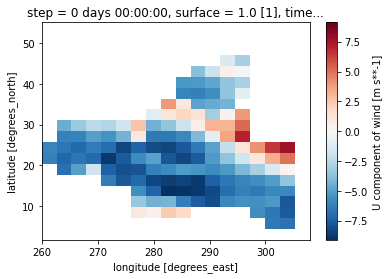

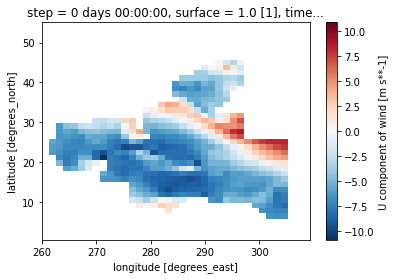

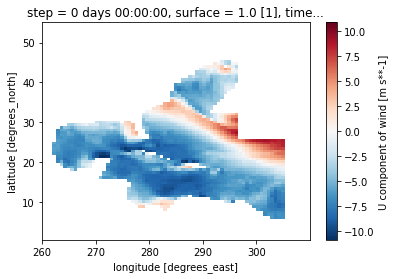

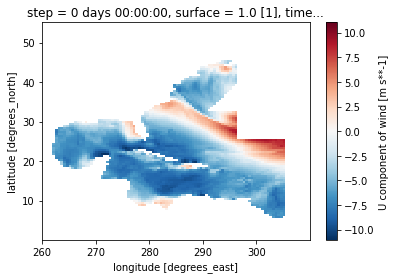

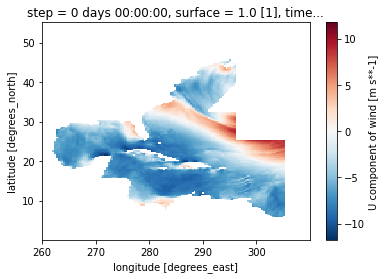

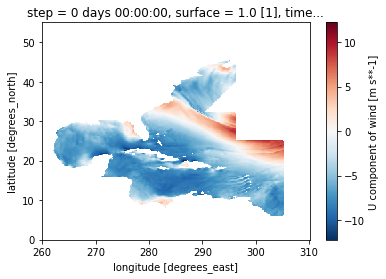

In [ ]:
for child in pyramid.children:
    child.ds.u.isel(time=0).plot()
    plt.show()
    plt.close()